## Exercise 9 - Image classification with Tensorflow
- In this exercise you utilize CIFAR-100 dataset with Tensorflow for image classification.
- Use [this example](https://hantt.pages.labranet.jamk.fi/ttc2050-material/material/09-ai-image-classification-tensorflow/) as a reference.
- Check the dataset description [here](https://www.cs.toronto.edu/~kriz/cifar.html).

1 Use the example linked above as the base for your code and load cifar-100 dataset with fine label mode using the following lines:

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")


2 Do the following changes compared to Cifar-10 example:

- Change the loss parameter for the models compile method to be *sparse_categorical_crossentropy*.
- Remove the binary conversion of labels (to_categorical function lines) and use y_train as the input for the model.
- The last layer neutron count must be 100 instead of 10 (10 was used in the example).
- List called *list_index* inside the predict_image function should contain integers from 0 to 99.
- Create a list called *classification* and add classes as elements to this list (100 classes). The list of classes can be found from the dataset description link above. **Important**: These classes should be in the list alphabetically!

Now run the whole notebook and present the model accuracy and model loss visualizations here as a screenshot.

In [3]:


x_train = x_train / 255
x_test = x_test / 255

classification = ['beaver', "dolphin", "otter", "seal", "whale", "aquarium fish", "flatfish", "ray", "shark", "trout", "orchids", "poppies", "roses", "sunflowers", "tulips", "bottles", "bowls", "cans", "cups", "plates", "apples", "mushrooms", "oranges", "pears", "sweet peppers", "clock", "computer keyboard", "lamp", "telephone", "television", "bed", "chair", "couch", "table", "wardrobe", "bee", "beetle", "butterfly", "caterpillar", "cockroach", "bear", "leopard", "lion", "tiger", "wolf", "bridge", "castle", "house", "road", "skyscraper", "cloud", "forest", "mountain", "plain", "sea", "camel", "cattle", "chimpanzee", "elephant", "kangaroo", "fox", "porcupine", "possum", "raccoon", "skunk", "crab", "lobster", "snail", "spider", "worm", "baby", "boy", "girl", "man", "woman", "crocodile", "dinosaur", "lizard", "snake", "turtle", "hamster", "mouse", "rabbit", "shrew", "squirrel", "maple", "oak", "palm", "pine", "willow", "bicycle", "bus", "motorcycle", "pickup truck", "train", "lawn-mower", "rocket", "streetcar", "tank", "tractor"]

classification.sort()


model = Sequential()

#Add the first layer (Convolution layer for extracting the features from the input image)
model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation="relu") )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

#Add a drop out layer with 50 % dropout rate
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

#Add a layer with 10 neurons and convert data into the probabilities
model.add(Dense(100, activation="softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

hist = model.fit(x_train, y_train, batch_size = 128, epochs = 11, validation_split = 0.1)


Epoch 1/11
352/352 [==============================] - 19s 53ms/step - loss: 4.4162 - accuracy: 0.0278 - val_loss: 3.8996 - val_accuracy: 0.0948
Epoch 2/11
352/352 [==============================] - 18s 51ms/step - loss: 3.8236 - accuracy: 0.1070 - val_loss: 3.5496 - val_accuracy: 0.1522
Epoch 3/11
352/352 [==============================] - 20s 58ms/step - loss: 3.5274 - accuracy: 0.1556 - val_loss: 3.3107 - val_accuracy: 0.1936
Epoch 4/11
352/352 [==============================] - 20s 55ms/step - loss: 3.3116 - accuracy: 0.1924 - val_loss: 3.1331 - val_accuracy: 0.2316
Epoch 5/11
352/352 [==============================] - 19s 54ms/step - loss: 3.1449 - accuracy: 0.2242 - val_loss: 3.0812 - val_accuracy: 0.2432
Epoch 6/11
352/352 [==============================] - 19s 54ms/step - loss: 3.0195 - accuracy: 0.2480 - val_loss: 2.9673 - val_accuracy: 0.2664
Epoch 7/11
352/352 [==============================] - 20s 58ms/step - loss: 2.9045 - accuracy: 0.2722 - val_loss: 2.9002 - val_accuracy:

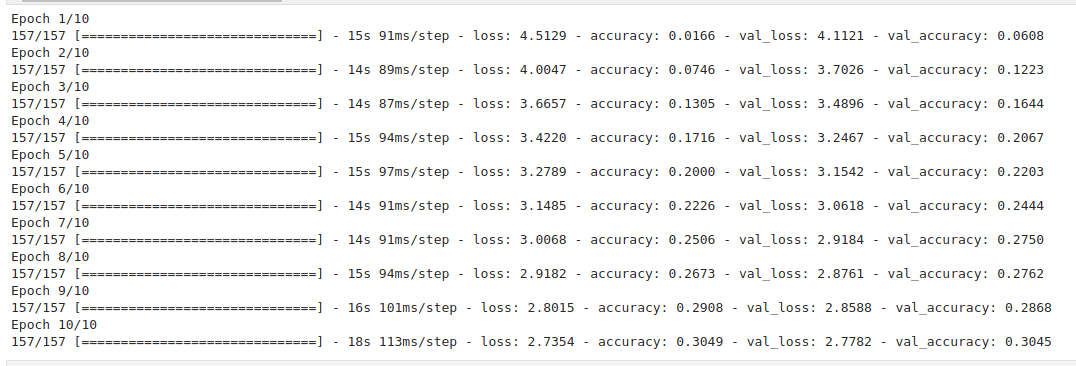

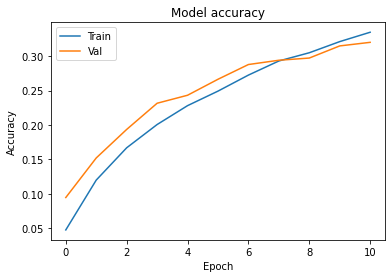

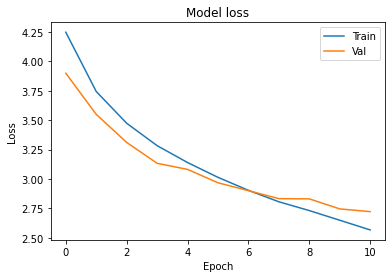

In [4]:
def predict_image(input_img):
    # Image needs to be resized to 32x32 since model input shape was previously set to 32x32,3 --> model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)) )!
    resized_img = resize(input_img,(32,32,3))

    # Show the image
    img = plt.imshow(input_img)

    #Test the model prediction capabilities for the first test image
    img_prediction = model.predict(np.array([resized_img]))

    #Sort the predictions from least to greatest
    list_index = list(range(100))
    x = img_prediction

    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp       
    for i in range(5):
        print(classification[list_index[i]], ":", round(img_prediction[0][list_index[i]] * 100, 2), "%")
                

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

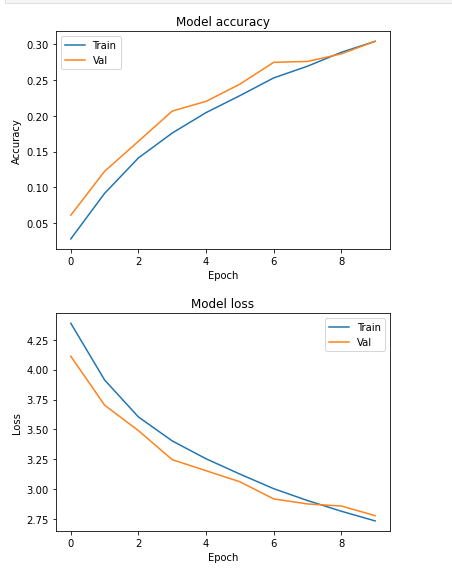

3 Check the classes list and find three or more example images from the Internet presenting some of those classes (for example *keyboard*, *shark*, *apple*...). Present five highest predictions to images you have chosen.

bee : 3.75 %
beetle : 3.48 %
aquarium fish : 1.66 %
bicycle : 1.6 %
apples : 0.68 %


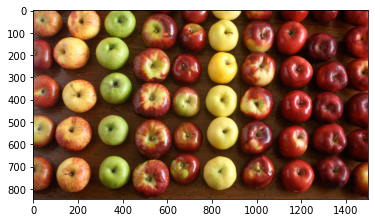

In [5]:
apple = plt.imread('./kuvantunnistus/apple.jpg')
bus = plt.imread('./kuvantunnistus/bus.jpg')
crocodile = plt.imread('./kuvantunnistus/crocodile.jpeg')

predict_image(apple)

beaver : 7.39 %
bear : 2.4 %
baby : 1.16 %
bed : 0.85 %
bottles : 0.61 %


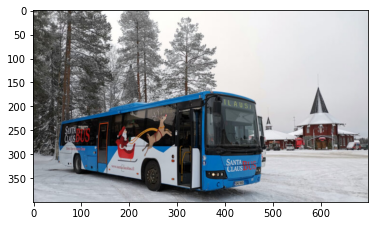

In [6]:
predict_image(bus)

beetle : 9.21 %
bear : 1.83 %
beaver : 1.78 %
bee : 1.44 %
bicycle : 0.33 %


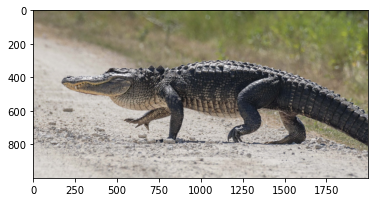

In [7]:
predict_image(crocodile)

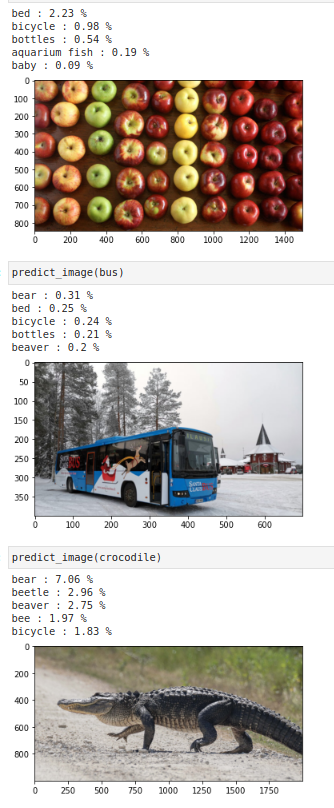

4 Try to improve the accuracy of your model's predictions by changing the parameters (batch_size, epochs and validation_split). You may also change the structure of your convolutional neural network by adding / removing layers and adjusting the amount of neurons and options present in each layer.

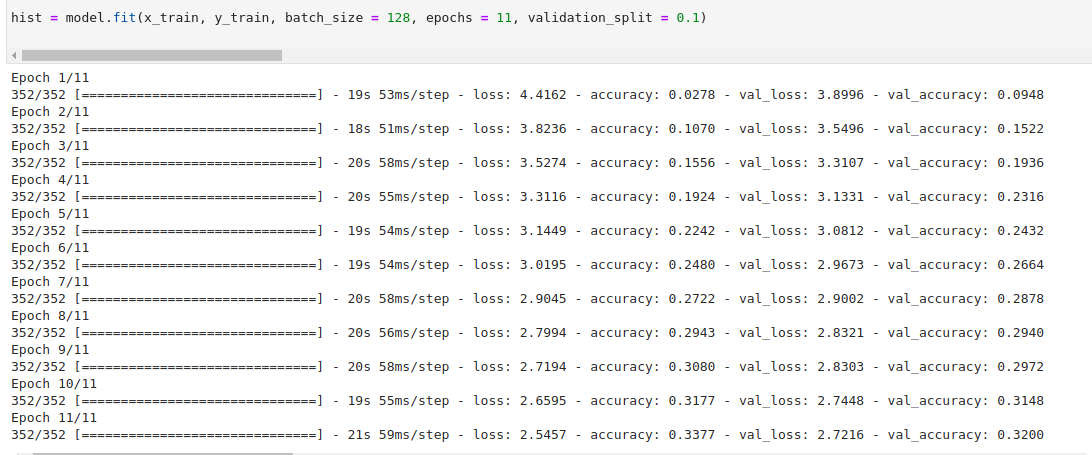

Tämän tarkemmaksi en saanut vaikka kuinka yritin